<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Weather Data

## Import Packages and Data Loading

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime
import dateutil
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
weather = pd.ExcelFile('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\WeatherDataNew.xlsx')
weather9 = pd.read_excel(weather, sheetname='2009')
weather10 = pd.read_excel(weather, sheetname='2010', na_values=[' ', '-'])
weather11 = pd.read_excel(weather, sheetname='2011', na_values=[' ', '-'])
weather12 = pd.read_excel(weather, sheetname='2012', na_values=[' ', '-'])
weather13 = pd.read_excel(weather, sheetname='2013', na_values=[' ', '-'])
weather14 = pd.read_excel(weather, sheetname='2014', na_values=[' ', '-'])
weather15 = pd.read_excel(weather, sheetname='2015', na_values=[' ', '-'])

In [4]:
df_list = [weather9, weather10, weather11, weather12, weather13, weather14, weather15]

weatherData = pd.concat(df_list)
weatherData.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,...,1023.0,1015.0,16.0,16.0,16.0,37,18,60,0,NaN
1,2009,Jan,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,...,1012.0,1007.0,16.0,13.0,2.0,27,10,48,T,Snow
2,2009,Jan,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,...,1015.0,1008.0,16.0,16.0,16.0,27,16,42,T,NaN
3,2009,Jan,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,...,1017.0,1015.0,16.0,16.0,16.0,32,12,40,0,NaN
4,2009,Jan,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,...,1014.0,1013.0,16.0,16.0,16.0,23,11,34,T,NaN


In [5]:
weatherData.shape

(2556, 23)

## Preprocessing

### Dropping Day Column

In [6]:
weatherData_noDay = weatherData.copy().drop('Day', axis = 1)
weatherData_noDay.shape

(2556, 22)

### Changing Column Names

In [7]:
weatherData_noDay.columns = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)',
                        'Dew Point high (°C)', 'Dew Point avg (°C)', 'Dew Point low (°C)',
                       'Humidity_high', 'Humidity_avg', 'Humidity_low','Sea Level Press high', 'Sea Level Press avg',
                       'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
                       'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

### Change Month Names To Numbers

In [8]:
vals_to_replace = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6','Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}
weatherData_noDay['Month'] = weatherData_noDay['Month'].apply(lambda x: vals_to_replace[x])

### Replace T value With 0.01 in Precip (mm) sum Column
- In liquid Precipitation, anything less than 0.01 inch of rain is reported as a trace of rain

In [9]:
print("Nulls In (Precip (mm) sum) :", weatherData_noDay['Precip (mm) sum'].isnull().sum())
weatherData_noDay['Precip (mm) sum'] =   weatherData_noDay['Precip (mm) sum'].apply(lambda x: 0.01 if x == 'T' else x)  
weatherData_noDay['Precip (mm) sum'].isnull().sum()

Nulls In (Precip (mm) sum) : 1


1

### Convert Dtypes Of Columns

In [10]:
weatherData_noDay.dtypes

Year                      int64
Month                    object
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low          object
Wind (km/h) avg          object
Wind (km/h) high         object
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

In [11]:
weatherData_noDay.iloc[:, 2:-1] = weatherData_noDay.iloc[:, 2:-1].apply(pd.to_numeric, errors = 'coerce')
weatherData_noDay.dtypes

Year                      int64
Month                    object
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

### Filling Missing Values

In [12]:
weatherData_noDay.isnull().sum()/len(weatherData_noDay)*100

Year                     0.000000
Month                    0.000000
Temp high (°C)           0.078247
Temp avg (°C)            0.078247
Temp low (°C)            0.078247
Dew Point high (°C)      0.078247
Dew Point avg (°C)       0.078247
Dew Point low (°C)       0.078247
Humidity_high            0.078247
Humidity_avg             0.078247
Humidity_low             0.078247
Sea Level Press high     0.547731
Sea Level Press avg      0.547731
Sea Level Press low      0.547731
Visibility (km) high     0.899844
Visibility (km) avg      0.899844
Visibility (km) low      0.899844
Wind (km/h) low          0.586854
Wind (km/h) avg          0.586854
Wind (km/h) high         1.799687
Precip (mm) sum          0.039124
WeatherEvent            65.023474
dtype: float64

In [13]:
weatherData_noDay.iloc[:, 2:-1] = weatherData_noDay.iloc[:, 2:-1].apply(lambda x: x.fillna(x.mean()))
weatherData_noDay.loc[:, 'WeatherEvent'] = weatherData_noDay.loc[:, 'WeatherEvent'].fillna('Other')

In [14]:
weatherData_final = weatherData_noDay.copy()
weatherData_final.isnull().any()

Year                    False
Month                   False
Temp high (°C)          False
Temp avg (°C)           False
Temp low (°C)           False
Dew Point high (°C)     False
Dew Point avg (°C)      False
Dew Point low (°C)      False
Humidity_high           False
Humidity_avg            False
Humidity_low            False
Sea Level Press high    False
Sea Level Press avg     False
Sea Level Press low     False
Visibility (km) high    False
Visibility (km) avg     False
Visibility (km) low     False
Wind (km/h) low         False
Wind (km/h) avg         False
Wind (km/h) high        False
Precip (mm) sum         False
WeatherEvent            False
dtype: bool

## Extracting New Features From Weather Data

In [15]:
col_list = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)','Dew Point high (°C)', 'Dew Point avg (°C)', 
            'Dew Point low (°C)','Humidity_high', 'Humidity_avg', 'Humidity_low', 'Sea Level Press high','Sea Level Press avg',
            'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
            'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

In [16]:
features = {col_list[2]:['min','max','mean','var'],col_list[3]:['min','max','mean','var'],col_list[4]:['min','max','mean','var'],
           col_list[5]:['min','max','mean','var'], col_list[6]:['min','max','mean','var'], col_list[7]:['min','max','mean','var'],
           col_list[8]:['min','max','mean','var'], col_list[9]:['min','max','mean','var'], col_list[10]:['min','max','mean','var'],
col_list[11]:['min','max','mean','var'], col_list[12]:['min','max','mean','var'], col_list[13]:['min','max','mean','var'],
col_list[14]:['min','max','mean','var'], col_list[15]:['min','max','mean','var'], col_list[16]:['min','max','mean','var'],
col_list[17]:['min','max','mean','var'], col_list[18]:['min','max','mean','var'], col_list[19]:['min','max','mean','var']}

weather_features = weatherData_final.groupby(['Year','Month']).agg(features).reset_index()

In [17]:
weather_features.tail(5)

Year Month Temp high (°C)                             Temp avg (°C)        \
                          min   max       mean        var           min   max   
79  2015     5           17.0  31.0  25.677419  16.159140          13.0  26.0   
80  2015     6           13.0  32.0  25.800000  25.337931          12.0  28.0   
81  2015     7           24.0  36.0  29.967742   7.565591          22.0  31.0   
82  2015     8           27.0  35.0  30.516129   3.991398          23.0  31.0   
83  2015     9           22.0  36.0  28.133333  14.050575          18.0  31.0   

                            ...     Wind (km/h) low             \
         mean        var    ...                mean        var   
79  20.483871  13.191398    ...           21.129032  17.582796   
80  21.866667  17.636782    ...           21.100000  20.162069   
81  26.129032   5.716129    ...           18.000000  19.000000   
82  26.322581   3.625806    ...           18.548387  21.522581   
83  23.700000  10.975862    ...           19.433333  24.805747   

   Wind (km/h) avg                            Wind (km/h) high        \
               min   max      mean        var              min   max   
79             3.0  12.0  6.806452   5.161290             18.0  47.0   
80             4.0  17.0  7.533333   6.533333             21.0  47.0   
81             2.0   9.0  5.483871   3.324731             19.0  50.0   
82             3.0   9.0  5.903226   2.756989             23.0  58.0   
83             2.0  13.0  7.033333  11.343678             18.0  43.0   

                          
         mean        var  
79  34.225806  50.913978  
80  33.800000  46.441379  
81  30.032258  48.298925  
82  30.451613  48.189247  
83  30.166667  51.247126  

[5 rows x 74 columns]

In [18]:
weather_features.columns = [x[0]+x[1] for x in weather_features.columns]
weather_features.head()

,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,Wind (km/h) lowmean,Wind (km/h) lowvar,Wind (km/h) avgmin,Wind (km/h) avgmax,Wind (km/h) avgmean,Wind (km/h) avgvar,Wind (km/h) highmin,Wind (km/h) highmax,Wind (km/h) highmean,Wind (km/h) highvar
0,2009,1,-9.0,8.0,0.741935,16.664516,-11.0,5.0,-2.096774,13.956989,...,27.000000,35.066667,4.0,18.0,12.000000,12.200000,21.0,60.0,39.322581,96.625806
1,2009,10,7.0,23.0,16.258065,20.064516,6.0,19.0,12.870968,14.582796,...,23.516129,42.724731,2.0,19.0,9.677419,16.025806,14.0,71.0,34.419355,110.918280
2,2009,11,10.0,21.0,13.733333,8.202299,7.0,16.0,10.800000,5.889655,...,25.866667,41.429885,4.0,25.0,11.133333,25.636782,21.0,63.0,36.733333,108.685057
3,2009,12,-2.0,19.0,5.451613,29.055914,-5.0,15.0,2.354839,24.303226,...,28.580645,36.651613,6.0,23.0,13.451613,19.189247,24.0,64.0,42.838710,97.473118
4,2009,2,-6.0,18.0,6.964286,30.850529,-9.0,13.0,2.785714,24.322751,...,27.928571,47.253968,6.0,22.0,12.214286,21.656085,24.0,77.0,41.642857,167.349206


In [19]:
weatherData_avg = weatherData_final.groupby(['Year', 'Month']).agg('mean').reset_index()
weatherData_avg.head()

,Year,Month,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,Humidity_avg,...,Sea Level Press high,Sea Level Press avg,Sea Level Press low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip (mm) sum
0,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.443226
1,2009,10,16.258065,12.870968,9.354839,9.838710,7.032258,3.903226,85.903226,69.354839,...,1020.354839,1016.774194,1013.064516,16.0,14.064516,11.129032,23.516129,9.677419,34.419355,4.572581
2,2009,11,13.733333,10.800000,7.566667,7.000000,4.166667,1.433333,80.466667,66.600000,...,1022.266667,1019.033333,1015.633333,16.0,14.666667,11.833333,25.866667,11.133333,36.733333,1.364333
3,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,1022.483871,1017.225806,1012.193548,16.0,13.774194,10.677419,28.580645,13.451613,42.838710,5.957097
4,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,1021.714286,1017.071429,1012.464286,16.0,15.178571,13.285714,27.928571,12.214286,41.642857,0.781071


In [20]:
weatherData_avg['Month'] = weatherData_avg['Month'].astype('int64')
weatherData_avg.dtypes

Year                      int64
Month                     int64
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
dtype: object

### Correlation Between mean Weather Features

In [21]:
corplot = weatherData_noDay.iloc[:, 2:-1].corr()
corplot.style.background_gradient()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,Humidity_avg,Humidity_low,Sea Level Press high,Sea Level Press avg,Sea Level Press low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip (mm) sum
Temp high (°C),1,0.990251,0.959873,0.898537,0.896428,0.87974,0.25041,0.166505,0.0551162,-0.294684,-0.159457,-0.0369513,-0.0114966,0.0288098,-0.0292805,-0.37729,-0.385455,-0.327161,-0.00943249
Temp avg (°C),0.990251,1,0.988038,0.920469,0.926844,0.916767,0.2887,0.226239,0.126009,-0.312234,-0.172471,-0.0471537,-0.0259429,-0.00403617,-0.0603171,-0.384272,-0.38442,-0.33779,0.0149111
Temp low (°C),0.959873,0.988038,1,0.925924,0.941607,0.939583,0.325586,0.287962,0.201992,-0.324804,-0.182158,-0.0557779,-0.042666,-0.0391114,-0.0922907,-0.384272,-0.374795,-0.342844,0.0405581
Dew Point high (°C),0.898537,0.920469,0.925924,1,0.979663,0.933724,0.584912,0.530674,0.389159,-0.346859,-0.263673,-0.177491,-0.0833298,-0.247297,-0.328817,-0.321234,-0.337282,-0.27356,0.175271
Dew Point avg (°C),0.896428,0.926844,0.941607,0.979663,1,0.975692,0.577749,0.55818,0.44589,-0.355645,-0.252662,-0.149765,-0.0990106,-0.262195,-0.325253,-0.35575,-0.360181,-0.317206,0.182866
Dew Point low (°C),0.87974,0.916767,0.939583,0.933724,0.975692,1,0.510414,0.533773,0.467567,-0.337796,-0.20693,-0.0921586,-0.110351,-0.206722,-0.25231,-0.388345,-0.373071,-0.362418,0.150852
Humidity_high,0.25041,0.2887,0.325586,0.584912,0.577749,0.510414,1,0.915052,0.68239,-0.269839,-0.310759,-0.316744,-0.156004,-0.65514,-0.748657,-0.0806343,-0.113618,-0.077676,0.397867
Humidity_avg,0.166505,0.226239,0.287962,0.530674,0.55818,0.533773,0.915052,1,0.918638,-0.243345,-0.279029,-0.289079,-0.228681,-0.695123,-0.734229,-0.0709276,-0.0835013,-0.0784337,0.462441
Humidity_low,0.0551162,0.126009,0.201992,0.389159,0.44589,0.467567,0.68239,0.918638,1,-0.177264,-0.202488,-0.215338,-0.261686,-0.621017,-0.600345,-0.0480362,-0.0393128,-0.0654963,0.450376
Sea Level Press high,-0.294684,-0.312234,-0.324804,-0.346859,-0.355645,-0.337796,-0.269839,-0.243345,-0.177264,1,0.933294,0.804729,0.029788,0.181052,0.243554,-0.0883223,-0.0436111,-0.137506,-0.126029


In [22]:
########################### ------------------------------------------- ##################################

# Events_Holidays Data

## Load Data

In [23]:
data = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Events_HolidaysData.xlsx')
data.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


## Exclude 2016 Data

In [28]:
holiday_data = data[data['Year'] != 2016]
holiday_data.tail()

,Year,MonthDate,Event,DayCategory
125,2015,2026-11-01,Thanksgiving Day,Federal Holiday
126,2015,2024-12-01,Christmas Eve,Event
127,2015,2025-12-01,Christmas Day,Federal Holiday
128,2015,2026-12-01,Day After Christmas Day,Event
129,2015,1931-12-01,New Year's Eve,Event


## EDA and Preprocessing

In [1]:
print('Hape Of DataFrame', holiday_data.shape)
holiday_data.dtypes

NameError: name 'holiday_data' is not defined

In [54]:
print(holiday_data.Year.unique(), '\n')
print(np.min(holiday_data.MonthDate), '\n')
print(np.max(holiday_data.MonthDate), '\n')
print(len(holiday_data.Event.unique()), '\n')
print(holiday_data.DayCategory.unique())

[2009 2010 2011 2012 2013 2014 2015] 

1930-05-01 00:00:00 

2028-11-01 00:00:00 

23 

['Federal Holiday' 'Event']


## Extract Month & Day From MonthDate Column

In [55]:
holiday_data.MonthDate = holiday_data.MonthDate.astype(str).str[2:7]

holiday_data['Month'] = holiday_data['MonthDate'].str[3:5]
holiday_data['Day'] = holiday_data['MonthDate'].str[0:2]

In [56]:
holiday_data.head()

,Year,MonthDate,Event,DayCategory,Month,Day
0,2009,01-01,New Year's Day,Federal Holiday,01,01
1,2009,19-01,Martin Luther King Jr. Day,Federal Holiday,01,19
2,2009,14-02,Valentine's Day,Event,02,14
3,2009,16-02,Presidents' Day,Federal Holiday,02,16
4,2009,12-04,Easter Sunday,Event,04,12


In [57]:
holiday_data.dtypes

Year            int64
MonthDate      object
Event          object
DayCategory    object
Month          object
Day            object
dtype: object

In [58]:
vals_to_replace1 = {'01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12'}
holiday_data['Month'] = holiday_data['Month'].apply(lambda x: vals_to_replace1[x])

In [59]:
holiday_data.head()

,Year,MonthDate,Event,DayCategory,Month,Day
0,2009,01-01,New Year's Day,Federal Holiday,1,01
1,2009,19-01,Martin Luther King Jr. Day,Federal Holiday,1,19
2,2009,14-02,Valentine's Day,Event,2,14
3,2009,16-02,Presidents' Day,Federal Holiday,2,16
4,2009,12-04,Easter Sunday,Event,4,12


### Column TypeCasting

In [60]:
holiday_data[['Year']] = holiday_data['Year'].astype('int64')
holiday_data[['Month']] = holiday_data['Month'].astype('int64')

## Data Reshaping

In [61]:
holiday_pivot = pivot_table(holiday_data, values = ['Day'], index = ['Year', 'Month'], columns = ['DayCategory'], 
                            aggfunc=np.count_nonzero, fill_value=0)
holiday_pivot.head()

Day                
DayCategory Event Federal Holiday
Year Month                       
2009 1          0               2
     2          1               1
     4          1               0
     5          1               1
     6          1               0

In [62]:
holiday_pivot.columns = ['Event', 'Federal Holiday']
holiday_pivot = holiday_pivot.reset_index()
holiday_pivot.head()

,Year,Month,Event,Federal Holiday
0,2009,1,0,2
1,2009,2,1,1
2,2009,4,1,0
3,2009,5,1,1
4,2009,6,1,0


### Extract New Features

In [63]:
holiday_pivot['Event_Yes_No'] = holiday_pivot['Event'].apply(lambda x: 'No' if x==0 else 'Yes')
holiday_pivot['Federal Holiday_Yes_No'] = holiday_pivot['Federal Holiday'].apply(lambda x: 'No' if x==0 else 'Yes')
# holiday_pivot = holiday_pivot.reset_index()
holiday_pivot.head()

,Year,Month,Event,Federal Holiday,Event_Yes_No,Federal Holiday_Yes_No
0,2009,1,0,2,No,Yes
1,2009,2,1,1,Yes,Yes
2,2009,4,1,0,Yes,No
3,2009,5,1,1,Yes,Yes
4,2009,6,1,0,Yes,No


In [64]:
############################## ---------------------------------------------------- ##################################

# Macro Economic Data

## Load Data

In [65]:
macroEconomincData = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\MacroEconomicData.xlsx', 
                             na_values=['?', ' '], parse_dates=['Year-Month'])
print(macroEconomincData.shape)
macroEconomincData.head()

(96, 18)


,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


### Excluding 2016 Records

In [66]:
economincData = macroEconomincData.loc[0:84,]   # Selecting till 2015 only.
economincData.tail()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
79,2015-08-01,18201.392888,16505.537615,261.347,Democrats,5.1,12.10,9.80,25.04,NaN,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475
80,2015-09-01,18317.816120,16601.489879,261.887,Democrats,5.0,12.10,9.80,25.05,NaN,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700
81,2015-10-01,18278.304270,16540.859723,261.515,Democrats,5.0,12.10,9.80,25.14,183.0,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700
82,2015-11-01,18266.244605,16524.199494,261.009,Democrats,5.0,12.22,9.66,25.38,NaN,69.22,0.28,8.398,7.995,770,12.830,3.675,9.700
83,2015-12-01,18317.129125,16578.004544,259.941,Democrats,5.0,12.22,9.66,25.21,NaN,70.39,1.69,8.398,7.995,755,12.580,3.675,9.500


## EDA and Preprocessing

In [67]:
economincData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 18 columns):
Year-Month                                                           84 non-null datetime64[ns]
Monthly Nominal GDP Index (inMillion$)                               84 non-null float64
Monthly Real GDP Index (inMillion$)                                  84 non-null float64
CPI                                                                  84 non-null float64
PartyInPower                                                         84 non-null object
unemployment rate                                                    84 non-null float64
CommercialBankInterestRateonCreditCardPlans                          84 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    84 non-null float64
Earnings or wages  in dollars per hour                               84 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            11 non-null float64
C

### Checking Null Values and unique values

In [68]:
print(economincData.PartyInPower.unique())
economincData['AdvertisingExpenses (in Thousand Dollars)'].isnull().sum()/len(economincData)*100

['Democrats']


86.90476190476191

### Extract Month and Year Columns

In [69]:
economincData['Year'] = economincData['Year-Month'].dt.year
economincData['Month'] = economincData['Year-Month'].dt.month
economincData.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


### Drop Unnecessary Columns [ PartyInPower, Year-Month ]

In [70]:
economincData = economincData.drop('PartyInPower', axis=1)    # Contains Only One Value In It.
economincData = economincData.drop('Year-Month', axis=1)      # Date and Month are Seperated as New Columns
economincData = economincData.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1)# Do not have proper correlation and had 85% nulls. 
economincData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
Monthly Nominal GDP Index (inMillion$)                               84 non-null float64
Monthly Real GDP Index (inMillion$)                                  84 non-null float64
CPI                                                                  84 non-null float64
unemployment rate                                                    84 non-null float64
CommercialBankInterestRateonCreditCardPlans                          84 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    84 non-null float64
Earnings or wages  in dollars per hour                               84 non-null float64
Cotton Monthly Price - US cents per Pound(lbs)                       84 non-null float64
Change(in%)                                                          84 non-null float64
Average upland planted(million acres)                                84 non-null float64
Average

### Outliers Identification Using Box Plot

In [71]:
num_cols = economincData.iloc[:, 0:-2]
labels = num_cols.columns
scale = MinMaxScaler()
num_cols_scaled = pd.DataFrame(scale.fit_transform(num_cols), columns=labels)

In [72]:
sns.set(font_scale=2)

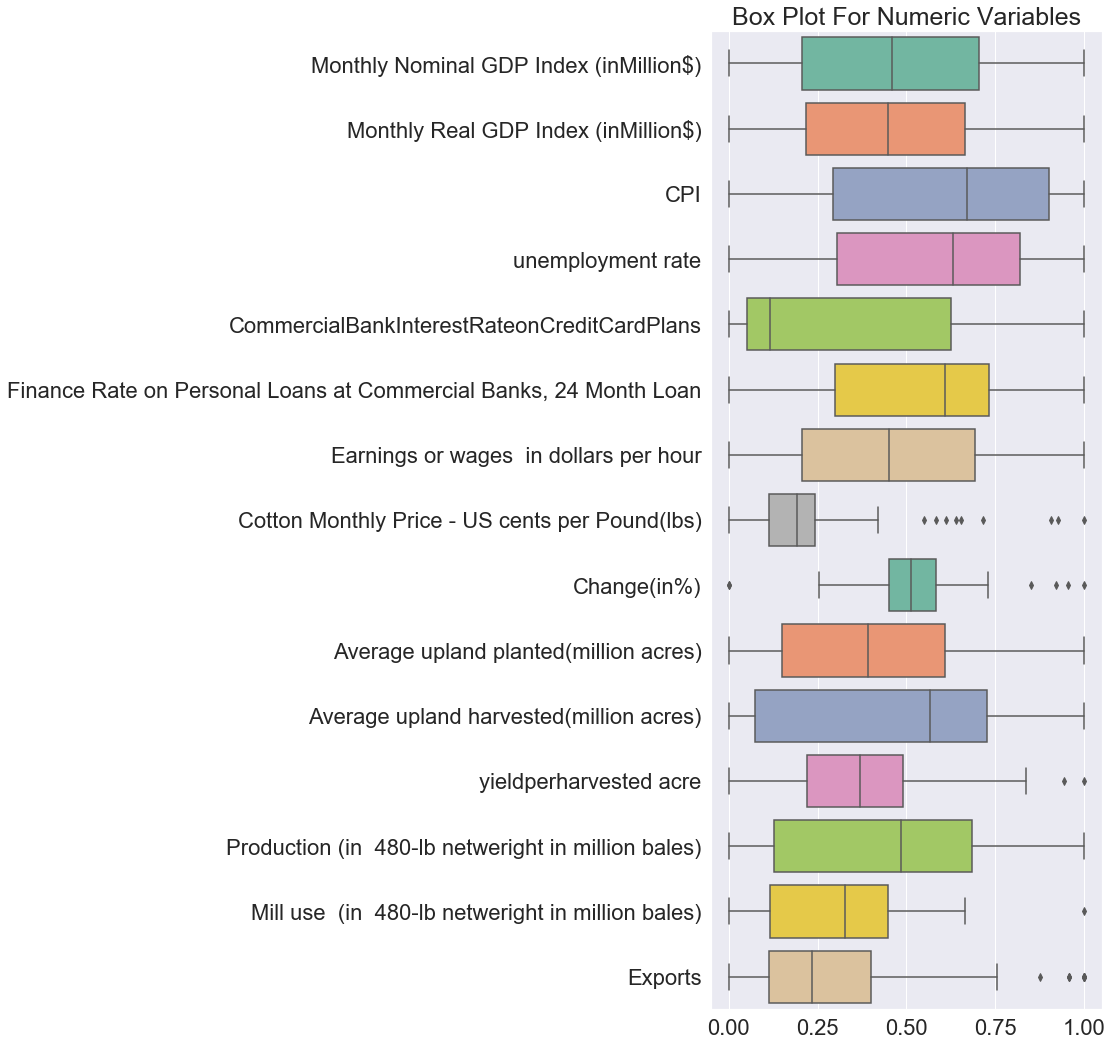

In [73]:
fig, ax = plt.subplots(figsize = (7,18))
sns.boxplot(data = num_cols_scaled, orient='h', palette='Set2')
sns.set(font_scale=2)
ax.set_title('Box Plot For Numeric Variables', fontsize = 25)
plt.show()

### Finding Correlations

In [74]:
corr = num_cols.corr()
corr.style.background_gradient()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Monthly Nominal GDP Index (inMillion$),1,0.997417,0.959235,-0.956152,-0.78337,-0.835155,0.986787,-0.208562,-0.226574,0.0193618,0.0325404,-0.0906667,0.0158701,0.299169,-0.488749
Monthly Real GDP Index (inMillion$),0.997417,1,0.943493,-0.948336,-0.750267,-0.828176,0.982099,-0.203163,-0.214482,0.0098216,0.0491757,-0.104249,0.0286627,0.298861,-0.471631
CPI,0.959235,0.943493,1,-0.87805,-0.850575,-0.807173,0.94939,-0.12447,-0.294738,0.177438,0.0652722,-0.0341326,0.057672,0.193833,-0.473436
unemployment rate,-0.956152,-0.948336,-0.87805,1,0.787367,0.810887,-0.946724,0.338302,0.217833,0.114162,0.0998362,0.0961888,0.109757,-0.423596,0.552044
CommercialBankInterestRateonCreditCardPlans,-0.78337,-0.750267,-0.850575,0.787367,1,0.630589,-0.772433,0.260326,0.34763,-0.32725,-0.0303779,0.0162069,-0.0207462,-0.287147,0.507587
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",-0.835155,-0.828176,-0.807173,0.810887,0.630589,1,-0.841899,0.271466,0.0583423,0.101536,0.172467,-0.0527603,0.132691,-0.120945,0.441278
Earnings or wages in dollars per hour,0.986787,0.982099,0.94939,-0.946724,-0.772433,-0.841899,1,-0.190196,-0.17978,0.00945483,0.00179827,-0.100621,-0.0168023,0.26876,-0.49097
Cotton Monthly Price - US cents per Pound(lbs),-0.208562,-0.203163,-0.12447,0.338302,0.260326,0.271466,-0.190196,1,0.135434,0.294267,0.519094,0.208716,0.532459,0.0093618,0.715185
Change(in%),-0.226574,-0.214482,-0.294738,0.217833,0.34763,0.0583423,-0.17978,0.135434,1,-0.248174,0.0127428,0.154055,0.0453677,-0.285562,0.320149
Average upland planted(million acres),0.0193618,0.0098216,0.177438,0.114162,-0.32725,0.101536,0.00945483,0.294267,-0.248174,1,0.605732,-0.0211478,0.549069,-0.0547675,0.111429


### Plot Analysis

- "Unemployment Rate" have high Correlation With 
  "CommercialBankInterestRateonCreditCardPlans" and "Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan".


- "Earnings or wages in dollars per hour" have morethan 98% correlation With "Nominal" And "Real GDP" Columns.


- "Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan" has " -84% "  Correlation With "Earnings or wages in   dollars per hour"


- "Cotton Monthly Price - US cents per Pound(lbs)" has 71% "Correlation With Exports."

In [75]:
########################### ------------------------------------------- ##################################

# Train Dataset  [ Cloths Sales ]

## Load Data

In [76]:
trainDf = pd.read_csv('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Train.csv', na_values=[' '])
trainDf.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [77]:
trainDf.isnull().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

In [78]:
trainDf['YearMonth'] = trainDf['Year'].map(str) + "-" + trainDf['Month'].map(str)
trainDf['YearMonth'] = pd.to_datetime(trainDf['YearMonth'], format='%Y-%m')
trainDf.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),YearMonth
0,2009,1,WomenClothing,1755.0,2009-01-01
1,2009,1,MenClothing,524.0,2009-01-01
2,2009,1,OtherClothing,936.0,2009-01-01
3,2009,2,WomenClothing,1729.0,2009-02-01
4,2009,2,MenClothing,496.0,2009-02-01


### Each Year, Each Month, Each Product Product Sales

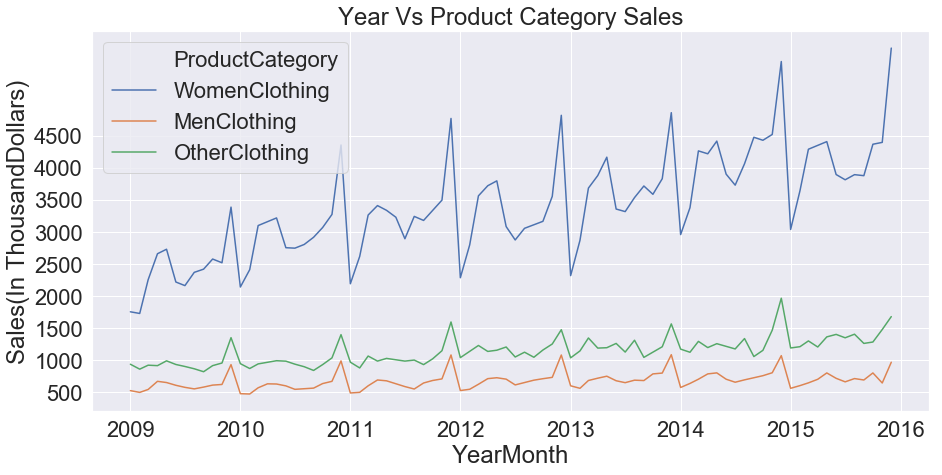

In [79]:
plt.subplots(figsize = (15, 7))
sns.lineplot(x="YearMonth", y="Sales(In ThousandDollars)", hue="ProductCategory", data = trainDf)
plt.yticks(np.arange(500,5000, 500))
plt.title('Year Vs Product Category Sales')
plt.show()

### Plot Analysis

- WomenClothing Sales are increasing Every Year. It is observed that WemonClothing Sales has "Trend" and "Seasonality".


- MenClothing and OtherClothing Sales have very low increase with respect to WomenClothing. It is almost "Constant".


- But In common, all types of cloths have high sales in lastweek of September to December Month.


In [80]:
trainDf.dtypes

Year                                  int64
Month                                 int64
ProductCategory                      object
Sales(In ThousandDollars)           float64
YearMonth                    datetime64[ns]
dtype: object

## Data Preprocessing 

### Fill Missing Values
- Fill Missing Values By Grouping On Product Category.

In [81]:
trainDf['Sales(In ThousandDollars)'] = trainDf.groupby('ProductCategory')['Sales(In ThousandDollars)'].apply(lambda x: x.fillna(x.mean()))
trainDf.isnull().any()

Year                         False
Month                        False
ProductCategory              False
Sales(In ThousandDollars)    False
YearMonth                    False
dtype: bool

## Data Reshaping

In [82]:
train_pivoted = pivot_table(trainDf, index = ['Year', 'Month'], values = ['Sales(In ThousandDollars)'], columns = ['ProductCategory'])
train_pivoted.head()

Sales(In ThousandDollars)                            
ProductCategory               MenClothing OtherClothing WomenClothing
Year Month                                                           
2009 1                              524.0         936.0        1755.0
     2                              496.0         859.0        1729.0
     3                              542.0         921.0        2256.0
     4                              669.0         914.0        2662.0
     5                              650.0         989.0        2732.0

In [83]:
train_pivoted.shape

(84, 3)

In [84]:
train_pivoted.columns = ['MenClothing_Sales', 'OtherClothing_Sales', 'WomenClothing_Sales']
train_pivoted = train_pivoted.reset_index()
train_pivoted.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales
0,2009,1,524.0,936.0,1755.0
1,2009,2,496.0,859.0,1729.0
2,2009,3,542.0,921.0,2256.0
3,2009,4,669.0,914.0,2662.0
4,2009,5,650.0,989.0,2732.0


## Acf and Pacf Plots

In [85]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

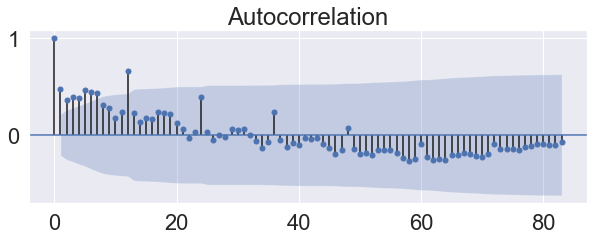

In [86]:
pyplot.figure(figsize=(10, 7))
pyplot.subplot(211)
plot_acf(train_pivoted['WomenClothing_Sales'], ax = pyplot.gca())
pyplot.show()

- Observations:

from the above plot, it is observed that after every 12th point there is correlation.
Means WomenClothing Has seasonality, so Bolt winter's technique can be used..

WomenClothing Has seasonality, so Bolt winters technique can be used.


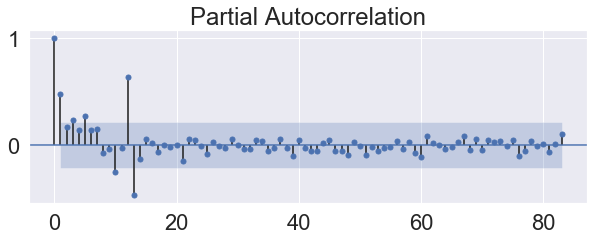

In [87]:
pyplot.figure(figsize=(10, 7))
pyplot.subplot(211)
plot_pacf(train_pivoted['WomenClothing_Sales'], ax = pyplot.gca())
pyplot.show()

### Create Date Column 

In [88]:
train_pivoted['Date'] = train_pivoted['Year'].map(str) + "-" + train_pivoted['Month'].map(str)
train_pivoted['Date'] = pd.to_datetime(train_pivoted['Date'], format='%Y-%m')
train_pivoted.tail()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Date
79,2015,8,712.0,1405.0,3897.0,2015-08-01
80,2015,9,690.0,1261.0,3881.0,2015-09-01
81,2015,10,800.0,1283.0,4372.0,2015-10-01
82,2015,11,643.0,1478.0,4401.0,2015-11-01
83,2015,12,967.0,1680.0,5874.0,2015-12-01


## EDA 

In [89]:
train_pivoted.shape

(84, 6)

In [90]:
train_pivoted.dtypes

Year                            int64
Month                           int64
MenClothing_Sales             float64
OtherClothing_Sales           float64
WomenClothing_Sales           float64
Date                   datetime64[ns]
dtype: object

In [91]:
train_pivoted.describe()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2012.000000,6.500000,678.950000,1143.506329,3409.812500
std,2.012012,3.472786,133.684388,210.143661,822.059859
min,2009.000000,1.000000,471.000000,819.000000,1729.000000
25%,2010.000000,3.750000,598.750000,984.750000,2855.750000
50%,2012.000000,6.500000,673.000000,1143.506329,3385.500000
75%,2014.000000,9.250000,711.250000,1258.000000,3886.500000
max,2015.000000,12.000000,1085.000000,1967.000000,5874.000000


In [92]:
train_pivoted.isnull().sum()

Year                   0
Month                  0
MenClothing_Sales      0
OtherClothing_Sales    0
WomenClothing_Sales    0
Date                   0
dtype: int64

In [93]:
train_pivoted['Sales(In ThousandDollars)'] = train_pivoted['MenClothing_Sales']+train_pivoted['OtherClothing_Sales']+train_pivoted['WomenClothing_Sales']  
train_pivoted.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Date,Sales(In ThousandDollars)
0,2009,1,524.0,936.0,1755.0,2009-01-01,3215.0
1,2009,2,496.0,859.0,1729.0,2009-02-01,3084.0
2,2009,3,542.0,921.0,2256.0,2009-03-01,3719.0
3,2009,4,669.0,914.0,2662.0,2009-04-01,4245.0
4,2009,5,650.0,989.0,2732.0,2009-05-01,4371.0


## Distribution Plots

### Distribution Sales(In ThousandDollars)

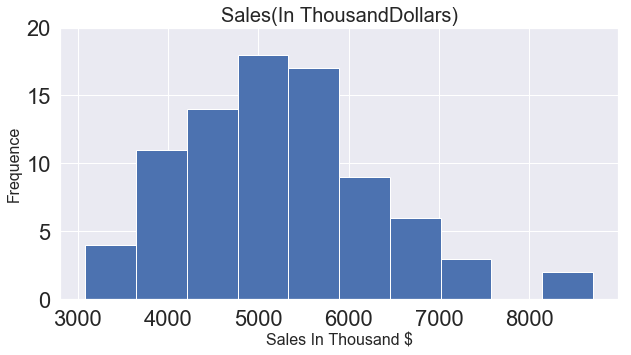

In [94]:
plt.subplots(figsize = (10, 5))
plt.hist(train_pivoted['Sales(In ThousandDollars)'])
plt.xlabel('Sales In Thousand $', fontdict={'size':16})
plt.ylabel('Frequence',  fontdict={'size':16})
plt.yticks(np.arange(0, 25, 5))
plt.title('Sales(In ThousandDollars)',  fontdict={'size':20})
plt.show()

### Plot Analysis

- Sales Of all categories togeather have normal Normal Distribution

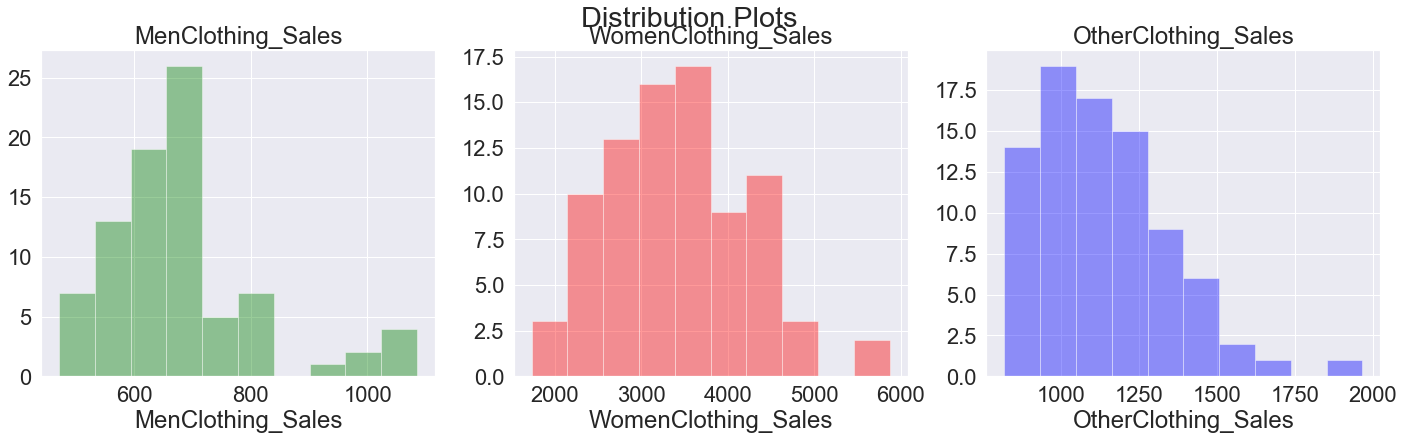

In [95]:
f, axes = plt.subplots(figsize=(24,6), nrows=1, ncols=3)

sns.distplot(train_pivoted.MenClothing_Sales, ax = axes[0], kde = False, color = 'green', bins=10).set_title('MenClothing_Sales')
sns.distplot(train_pivoted.WomenClothing_Sales, ax = axes[1], kde = False, color = 'red', bins=10).set_title("WomenClothing_Sales") 
sns.distplot(train_pivoted.OtherClothing_Sales, ax = axes[2], kde = False, color = 'blue', bins=10).set_title("OtherClothing_Sales") 

f.suptitle('Distribution Plots')
sns.set(font_scale = 1.8)
plt.show()

### Plot Analysis

- WomenClothing Sales Follows "Normal Distrinution".


- MenClothing also have "Normal Distribution (approximately)".


- OtherClothing has slightly "Right Skewness".


### Year vs Sales Plot

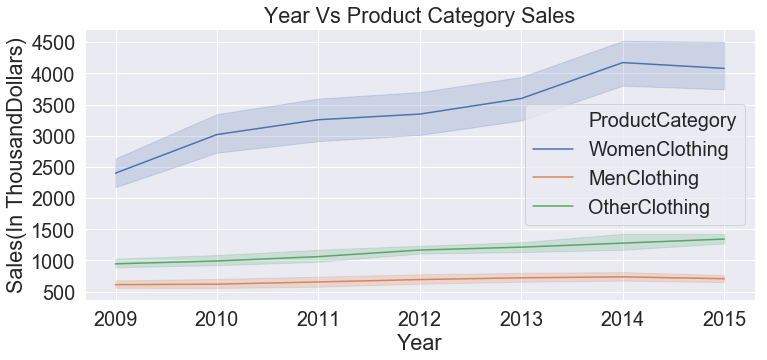

In [96]:
plt.subplots(figsize = (12, 5))
sns.lineplot(x="Year", y="Sales(In ThousandDollars)", hue="ProductCategory", data = trainDf)
plt.yticks(np.arange(500,5000, 500))
plt.title('Year Vs Product Category Sales')
plt.show()

- WomenClothing has high sales Throghout all the years especially from 2009 - 2010 and 2013 - 2014 Years.


- MenClothing Sales has slight increase from 2013 - 2015

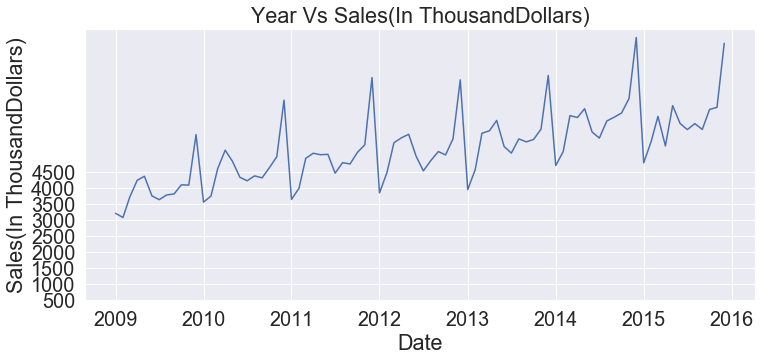

In [97]:
plt.subplots(figsize = (12, 5))
sns.lineplot(x="Date", y="Sales(In ThousandDollars)", data = train_pivoted)
plt.yticks(np.arange(500,5000, 500))
plt.title('Year Vs Sales(In ThousandDollars)')
plt.show()

# Merge all Datasets Together

In [98]:
trainingDataFull = pd.merge(weatherData_avg, holiday_pivot, how='left', left_on=['Year','Month'], right_on = ['Year','Month'])
trainingDataFull = pd.merge(trainingDataFull, economincData, how='left', left_on=['Year','Month'], right_on = ['Year','Month'])
trainingDataFull = pd.merge(trainingDataFull, train_pivoted, how='left', left_on=['Year','Month'], right_on = ['Year','Month'])

In [99]:
trainingDataFull

,Year,Month,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,Humidity_avg,...,Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Date,Sales(In ThousandDollars)
0,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,7.559,799,12.589,4.170,11.550,524.00,936.000000,1755.0000,2009-01-01,3215.000000
1,2009,10,16.258065,12.870968,9.354839,9.838710,7.032258,3.903226,85.903226,69.354839,...,7.586,799,12.631,3.370,10.000,610.00,914.000000,2579.0000,2009-10-01,4103.000000
2,2009,11,13.733333,10.800000,7.566667,7.000000,4.166667,1.433333,80.466667,66.600000,...,7.586,767,12.129,3.370,9.950,620.00,955.000000,2521.0000,2009-11-01,4096.000000
3,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,7.586,774,12.225,3.370,10.425,930.00,1351.000000,3390.0000,2009-12-01,5671.000000
4,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,7.559,799,12.589,3.870,11.100,496.00,859.000000,1729.0000,2009-02-01,3084.000000
5,2009,3,9.838710,5.967742,1.774194,0.258065,-2.903226,-6.741935,74.096774,57.064516,...,7.559,799,12.589,3.720,11.650,542.00,921.000000,2256.0000,2009-03-01,3719.000000
6,2009,4,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,7.559,787,12.400,3.620,12.225,669.00,914.000000,2662.0000,2009-04-01,4245.000000
7,2009,5,21.354839,17.000000,12.483871,12.967742,10.096774,6.516129,85.645161,68.516129,...,7.400,803,12.384,3.520,12.300,650.00,989.000000,2732.0000,2009-05-01,4371.000000
8,2009,6,23.666667,19.866667,15.833333,17.100000,15.366667,13.133333,95.200000,78.866667,...,7.760,796,12.876,3.470,10.300,607.00,932.000000,2220.0000,2009-06-01,3759.000000
9,2009,7,26.838710,22.741935,18.225806,18.838710,16.451613,13.612903,88.612903,70.806452,...,7.753,796,12.863,3.470,9.700,575.00,901.000000,2164.0000,2009-07-01,3640.000000


In [100]:
trainingDataFull.isnull().sum()

Year                                                                  0
Month                                                                 0
Temp high (°C)                                                        0
Temp avg (°C)                                                         0
Temp low (°C)                                                         0
Dew Point high (°C)                                                   0
Dew Point avg (°C)                                                    0
Dew Point low (°C)                                                    0
Humidity_high                                                         0
Humidity_avg                                                          0
Humidity_low                                                          0
Sea Level Press high                                                  0
Sea Level Press avg                                                   0
Sea Level Press low                                             

## Visual Expploratory Data Analysis On "trainDataFull" ( Fully Merged Data )

## Correlation Of All Variables With Target Variable

In [101]:
corr = trainingDataFull.corr()
corr.style.background_gradient()

### Top 4 Correlations Of "Sales(In ThousandDollars)"

In [102]:
corr_Sales = corr[['Sales(In ThousandDollars)']].sort_values('Sales(In ThousandDollars)', ascending=False).reset_index()
corr_Sales.head(10)

,index,Sales(In ThousandDollars)
0,Sales(In ThousandDollars),1.000000
1,WomenClothing_Sales,0.990436
2,OtherClothing_Sales,0.904553
3,MenClothing_Sales,0.864588
4,Monthly Nominal GDP Index (inMillion$),0.711630
5,Monthly Real GDP Index (inMillion$),0.710515
6,Earnings or wages in dollars per hour,0.694507
7,CPI,0.683552
8,Year,0.653597
9,Event,0.539977


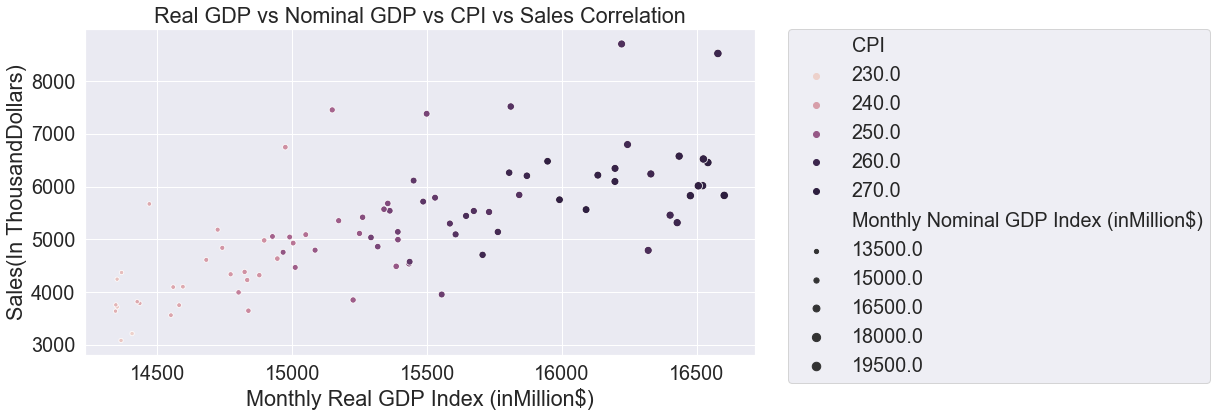

In [103]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Monthly Real GDP Index (inMillion$)', size='Monthly Nominal GDP Index (inMillion$)', 
                y='Sales(In ThousandDollars)', hue='CPI', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Real GDP vs Nominal GDP vs CPI vs Sales Correlation')
plt.show()

### Observation

- From the above Table Sales has 71.05% correlation with Real GDP Index, 71.16% correlation with CPI and 71% correlation With Nominal GDP Index and the same is observed in the plot above.


- It is clearly observed These variavles can be important variables for predicting Sales.

### Correlations Of All Variables With Sales(In ThousandDollars)

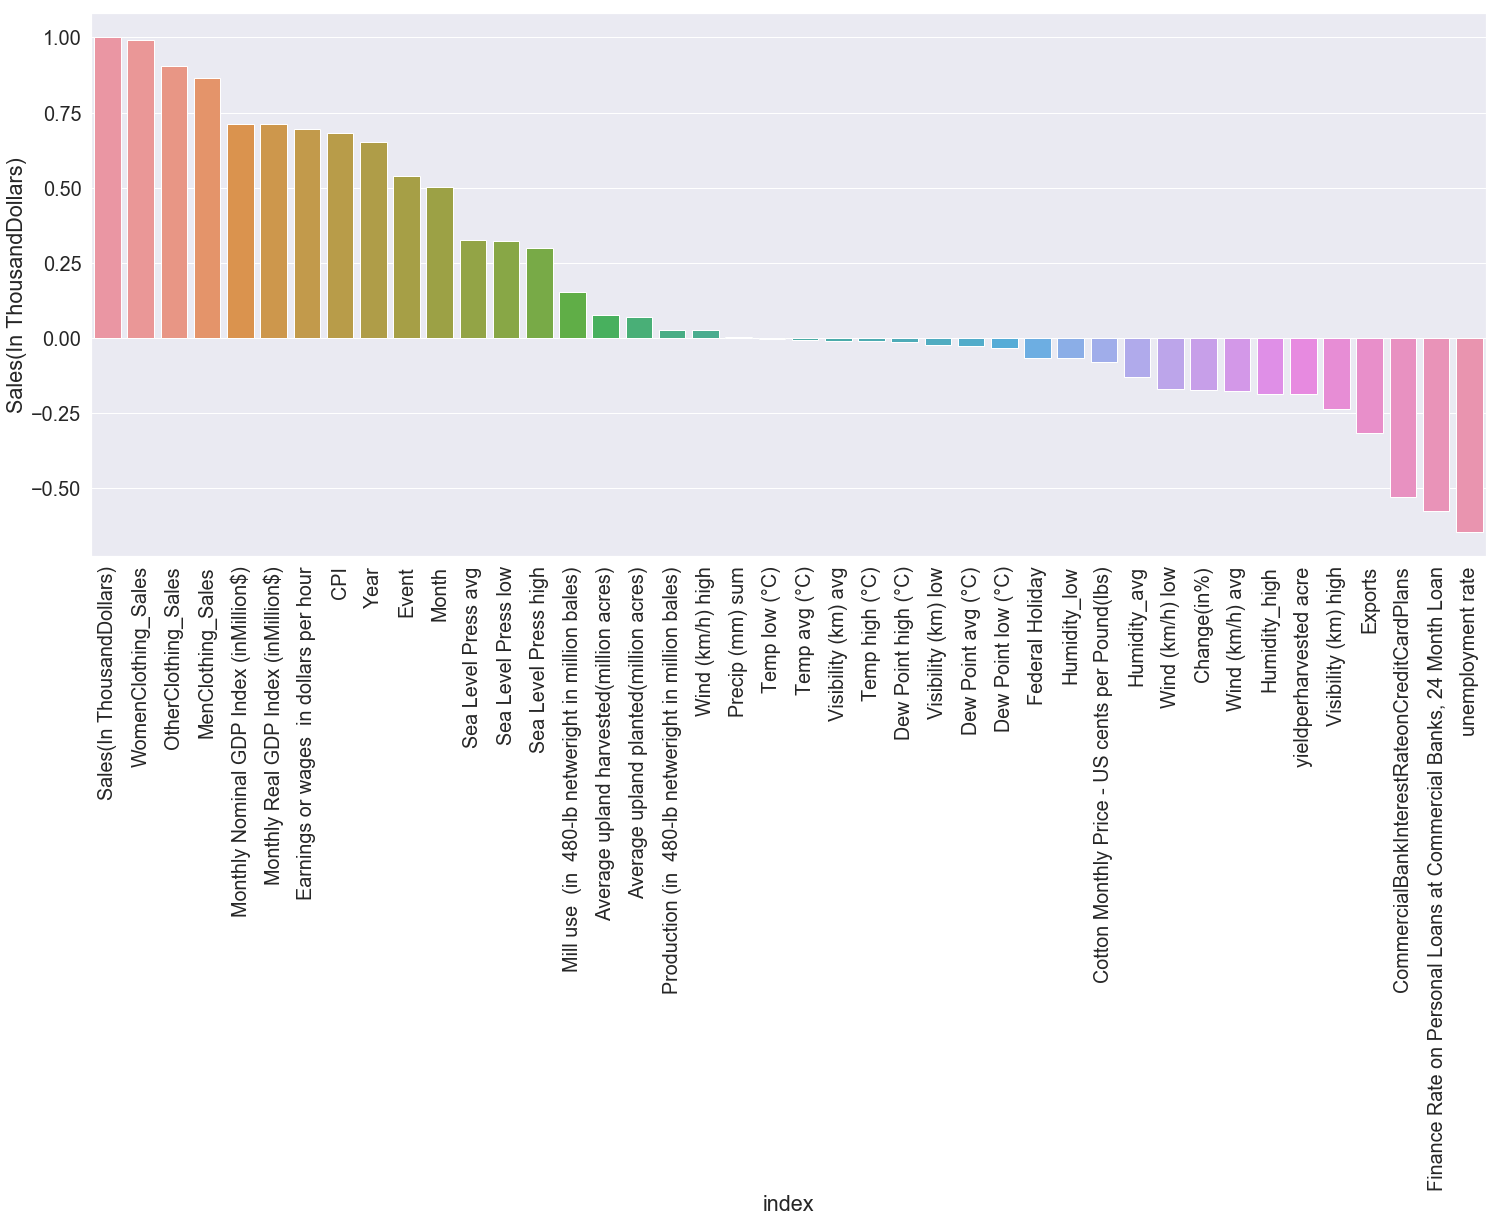

In [104]:
plt.subplots(figsize = (25, 10))
g = sns.barplot(x='index', y='Sales(In ThousandDollars)', data = corr_Sales)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### Top 4 Correlations Of "MenClothing_Sales"

In [105]:
corr_men = corr[['MenClothing_Sales']].sort_values('MenClothing_Sales', ascending=False).reset_index()
corr_men.head(10)

,index,MenClothing_Sales
0,MenClothing_Sales,1.000000
1,Sales(In ThousandDollars),0.864588
2,WomenClothing_Sales,0.813786
3,OtherClothing_Sales,0.787831
4,Event,0.650091
5,Month,0.636741
6,Monthly Nominal GDP Index (inMillion$),0.394155
7,Monthly Real GDP Index (inMillion$),0.390096
8,CPI,0.382205
9,Earnings or wages in dollars per hour,0.374101


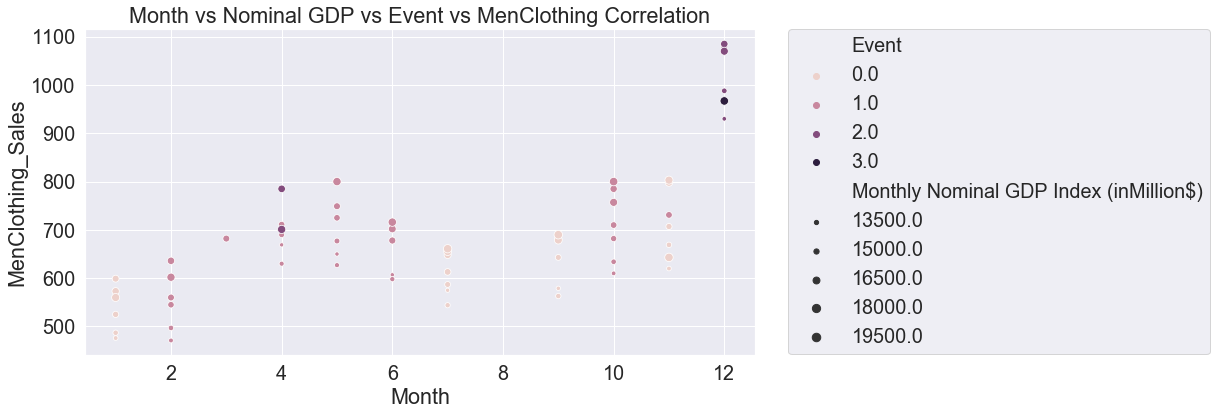

In [106]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Month',size='Monthly Nominal GDP Index (inMillion$)',
                y='MenClothing_Sales', hue = 'Event', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Month vs Nominal GDP vs Event vs MenClothing Correlation')
plt.show()

### Plot Analysis

- From the above Table Menclothing_Sales has 65% correlation with Event, 64% correlation with Month and 40% correlation With Nominal GDP Index and the same is observed from the above plot.


- It is clearly observed Event and Month variavles can be important for predicting MenClothing_Sales.

### Top 4 Correlations Of "WomenClothing_Sales"

In [107]:
corr_men = corr[['WomenClothing_Sales']].sort_values('WomenClothing_Sales', ascending=False).reset_index()
corr_men.head(10)

,index,WomenClothing_Sales
0,WomenClothing_Sales,1.000000
1,Sales(In ThousandDollars),0.990436
2,OtherClothing_Sales,0.848495
3,MenClothing_Sales,0.813786
4,Monthly Nominal GDP Index (inMillion$),0.727154
5,Monthly Real GDP Index (inMillion$),0.726710
6,Earnings or wages in dollars per hour,0.709473
7,CPI,0.703465
8,Year,0.671591
9,Event,0.498258


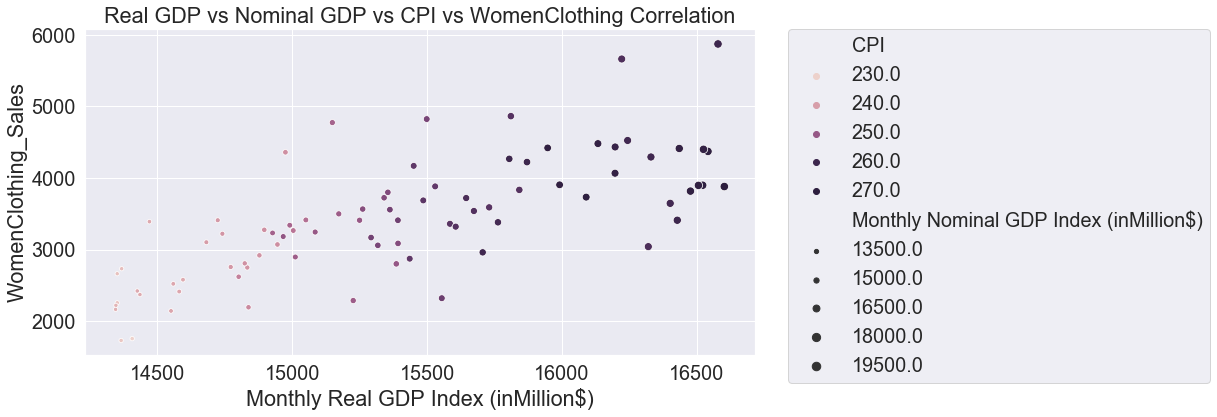

In [108]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Monthly Real GDP Index (inMillion$)', size='Monthly Nominal GDP Index (inMillion$)', 
                y='WomenClothing_Sales', hue='CPI', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Real GDP vs Nominal GDP vs CPI vs WomenClothing Correlation')
plt.show()

### Plot Analysis

- From the above Table Womenclothing_Sales has 72% correlation with Real GDP Index, 72% correlation with Nominal GDP Index and 70% CPI and the same is observed from the above plot.


- It is clearly observed, these variavles can be important for predicting MenClothing_Sales.

### Top 4Correlations Of "OtherClothing_Sales"

In [109]:
corr_others = corr[['OtherClothing_Sales']].sort_values('OtherClothing_Sales', ascending=False).reset_index() 
corr_others.head(10)

,index,OtherClothing_Sales
0,OtherClothing_Sales,1.000000
1,Sales(In ThousandDollars),0.904553
2,WomenClothing_Sales,0.848495
3,MenClothing_Sales,0.787831
4,Monthly Nominal GDP Index (inMillion$),0.697020
5,Monthly Real GDP Index (inMillion$),0.695396
6,Earnings or wages in dollars per hour,0.687695
7,Year,0.655252
8,CPI,0.647660
9,Event,0.518436


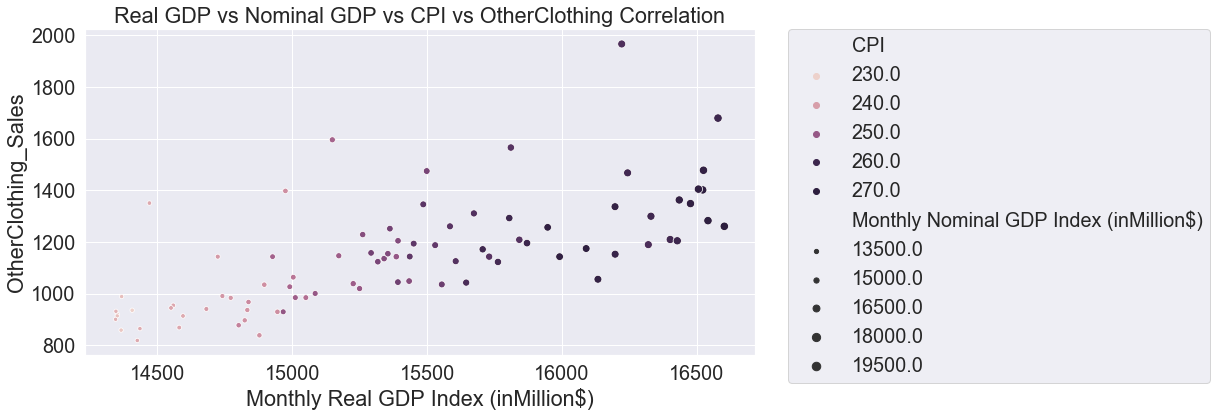

In [110]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Monthly Real GDP Index (inMillion$)', size='Monthly Nominal GDP Index (inMillion$)', 
                y='OtherClothing_Sales', hue='CPI', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Real GDP vs Nominal GDP vs CPI vs OtherClothing Correlation')
plt.show()

### Plot Analysis

- From the above Table OtherClothing_Sales has 70% correlation CPI, 70% correlation with Nominal GDP Index and 70% correlation With Nominal GDP Index and the same is observed from the above plot.


- It is clearly observed, these variavles can be important for predicting OtherClothing_Sales.

## Bivariate Correlation Plots

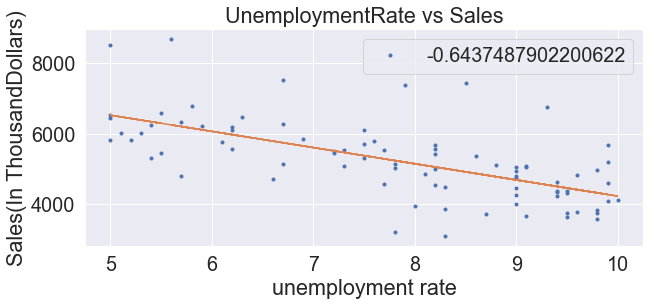

In [111]:
from numpy.polynomial.polynomial import polyfit

plt.subplots(figsize=(10, 4))
x = trainingDataFull['unemployment rate']
y = trainingDataFull['Sales(In ThousandDollars)']

b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.legend([x.corr(y)])
plt.title('UnemploymentRate vs Sales')
plt.xlabel('unemployment rate')
plt.ylabel('Sales(In ThousandDollars)')
plt.show()

### Plot Analysis

- Till now we have seen variables having positive high correlation with Sales variable.


- But there are variables holiding high negetive correlation also\


- Unemployment Rate has 64% negetive correlation with Sales.

### Exports vs Sales

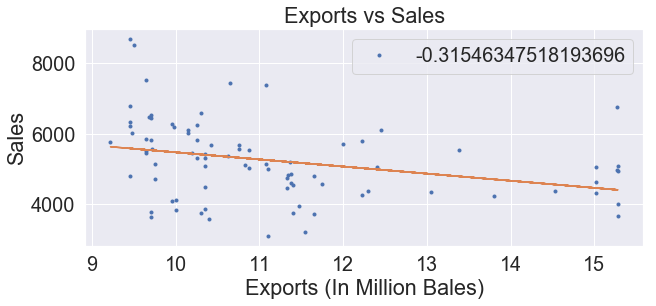

In [112]:
from numpy.polynomial.polynomial import polyfit

plt.subplots(figsize=(10, 4))
x = trainingDataFull['Exports']
y = trainingDataFull['Sales(In ThousandDollars)']

b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.legend([x.corr(y)])
plt.title('Exports vs Sales')
plt.xlabel('Exports (In Million Bales)')
plt.ylabel('Sales')
plt.show()

### Plot Analysis

- Cotton Exports has -31% correlation with Target i.e Sales.


- Exports between 9 - 10 Million Bales shows high negetive correlation with Sales.

### Interest Rates vs Sales

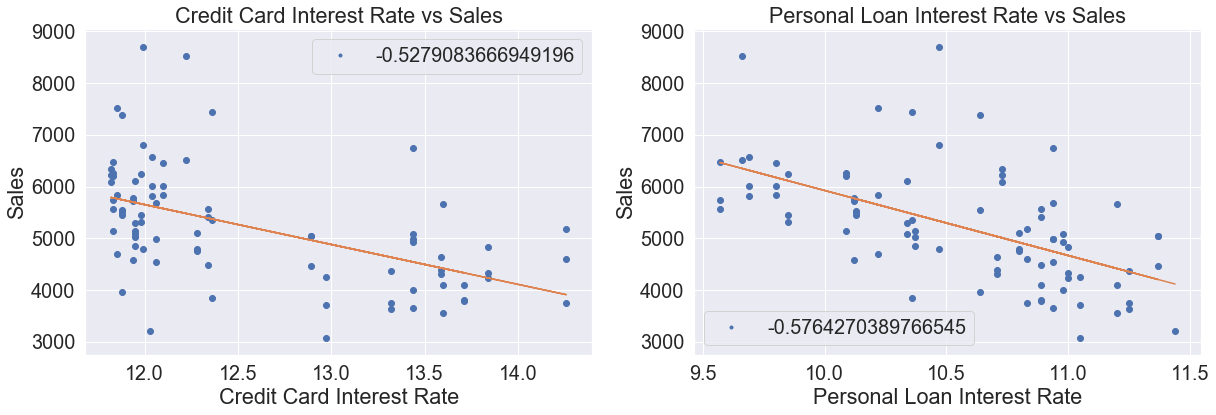

In [113]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (20,6))
#fig.autofmt_xdate(rotation = 45)
x1 = trainingDataFull['CommercialBankInterestRateonCreditCardPlans']
x2 = trainingDataFull['Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan']
y = trainingDataFull['Sales(In ThousandDollars)'] 

b, m = polyfit(x1, y, 1)
ax1.plot(x1, y, '.')
ax1.plot(x1, b + m * x1, '-')
ax1.legend([x1.corr(y)])

b1, m1 = polyfit(x2, y, 1)
ax2.plot(x2, y, '.')
ax2.plot(x2, b1 + m1 * x2, '-')
ax2.legend([x2.corr(y)])

ax1.scatter(x1, y)
ax1.set_xlabel('Credit Card Interest Rate'); ax1.set_ylabel('Sales'); ax1.set_title('Credit Card Interest Rate vs Sales')
ax2.scatter(x2, y)
ax2.set_xlabel('Personal Loan Interest Rate'); ax2.set_ylabel('Sales'); ax2.set_title('Personal Loan Interest Rate vs Sales')

plt.show()


### plot Analysis

- Here Credit Card Interest Rates has -53% correlation with Sales.

- With 2% change in InterestRates, Sales have come down by 2500 Million $ approximately.


- Personal Interest Rates also has -58% negetive correlation with Sales.

- More there are bunch of points explaining more sales at 10.5% - 11% interest rates but in the range of 3500 - 5000 M $.